In [1]:
from tqdm import tqdm_notebook
import random
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore') 
data = pd.read_csv('x.csv')
y = pd.read_csv('y.csv')
max_num = 1100
min_num = 900
data['T'] = y
tag_num_tabu = []
base_score = data['T'].mean()

In [56]:
def Make_insol(sol_num):
    sol = []
    not_search = [] ## 한 조건에 같은 tag 등장 제거
    cnt = 0
    while(sol_num):
        if cnt ==0:
            d = [1,np.random.randint(50),np.random.randint(1,11)]
            sol.append(d)
            not_search.append(d[1])
            sol_num-=1
        else:
            num = np.random.randint(50)
            if num not in not_search:
                d = [np.random.randint(2),num,np.random.randint(1,11)]
                sol.append(d)
                not_search.append(d[1])
                sol_num-=1
        cnt+= 1
    for j in sol:
        tag_num_tabu.append(j[:2])
    
    return sol

In [59]:
tag_num_tabu

[[1, 33], [0, 22]]

In [60]:
a

[[1, 33, 8], [0, 22, 4]]

In [58]:
a =  Make_insol(2)

In [3]:
def Select_data(sol,data):
    local_data = data.copy()
    for i in range(len(sol)):
        if sol[i][0] :
            new_data = local_data[data.iloc[:,sol[i][1]] >= sol[i][2]]
        else:
            new_data = local_data[data.iloc[:,sol[i][1]] < sol[i][2]]
        local_data = new_data
    score = new_data['T'].mean()
    len_data = len(new_data)
    return score, len_data

In [6]:
def Make_neighbor_sol2(sol,num):
    tot_sol = []
#     tot_sol.append(sol)
    a = len(sol)
    for i in range(num):
        t = Make_insol(a)
        if t[:2] not in tag_num_tabu:
            tot_sol.append(t)
            for i in t:
                
            tag_num_tabu.append(t)
        
    return tot_sol

In [6]:
def good_neighbor_sol(sol,num):
    tot_sol = []
    t = sol
    a = len(sol)
    tag = []
    for i in sol:
        tag.append(i[1])
    for i in range(num):    
        for i in range(a):
            tm = Make_insol(1)[0]
            d = True
            while(d):
                if tm[1] not in tag:
                    sol[i] = tm
                    tot_sol.append(sol)
                    sol = t
                    d = False
    return tot_sol

In [39]:
a = Make_insol(2)

In [40]:
a

[[1, 28, 2], [0, 38, 6]]

In [48]:
def Make_neighbor_sol3(sol,num,data,desire):
    tot_sol = []
#     tot_sol.append(sol)
    a = len(sol)
    while(num):
        t = Make_insol(a)
        c,b = Select_data(t,data)
        
        if (c>desire) and (300<=b<=3300):
            tot_sol.append(t)
#             print(t)
            num-=1
    return tot_sol

In [7]:
def Make_neighbor_sol(sol,num):
    tot_sol = []
#     tot_sol.append(sol)
    a = len(sol)
    for i in range(num):
        t = Make_insol(a)
        if t[:3] not in tag_num_tabu:
            tot_sol.append(Make_insol(a))
        
    return tot_sol

In [49]:
def Make_valneighbor(sol,num):
    tot_num_list = []
    nbr_sol = []
    tem = []
    for i in range(len(sol)):
        tem.append(sol[i][2])
    tot_num_list.append(tem)
    nbr = []
    num1 = num
    while(num) :
        num-=1
        flg = True
        cnt = 0
        while(flg):
            cnt+=1
            tem_ne = []
            for i in range(len(sol)):
                tem_ne.append(np.random.randint(1,11))
            if (tem_ne not in tot_num_list) or cnt ==5:
                flg = False
                nbr.append(tem_ne)
                tot_num_list.append(tem_ne)
                
                
                
    for i in range(num1):
        nbr_sol.append([])
     
        for j in range(len(sol)):
          
            nbr_sol[i].append([sol[j][0],sol[j][1],nbr[i][j]])
#     print(nbr_sol)
    return(nbr_sol)

In [50]:
def find_local_sol(nbr):
    
    tmsc = []
    tmso = []
    for i in nbr:
        
        a,b = Select_data(i,data)
        
        if min_num<=b<=max_num:
            tmsc.append(a)
            tmso.append(i)
    if len(tmsc):
        score = max(tmsc)
        sol = tmso[tmsc.index(score)]
        return sol
    else:return 0

In [51]:
def check_nbr(nbr, data,desire) : 
    new_nbr = []
    for i in (nbr) : 
        a, b = Select_data(i,data)
        if (a > desire) and (300<=b<=3300) :
#             print(b)
            new_nbr.append(i)
    return new_nbr

In [52]:
Make_neighbor_sol3

<function __main__.Make_neighbor_sol3(sol, num, data, desire)>

In [54]:
start = time.time()


graph_dot = []
tag_num_tabu = []

glo_sol = []
glo_scr = []
desire = base_score
for i in tqdm_notebook(range(1,6)):
    print(i)
    
    tag_num_tabu = []
    sol_l = []
    sol_s = []
    real_sol = []
    real_scr = []
    flg=True
    cnt = 0
    cnt2 = 0
    while(flg):
        cnt+=1
        print('i는',i)
        if cnt == 1:
            insol = Make_insol(i)
            glo_sol.append(insol)
            glo_scr.append(Select_data(insol,data)[0])
            nbr = Make_neighbor_sol3(insol,20*(i),data,desire)
            
        else:
            if len(sol_s):
                insol = sol_l[sol_s.index(max(sol_s))]
                nbr = Make_neighbor_sol3(insol,20*(i),data,desire)
            else : 
                insol = Make_insol(i)
                nbr = Make_neighbor_sol3(insol,20*(i),data,desire)
        print(nbr)        
        sol_l = []
        sol_s = []
        #######여기서 nbr 열망함수 적용 
#         nbr = check_nbr(nbr,data,desire)
        for j in tqdm_notebook(nbr):
            
            b_nbr = Make_valneighbor(j, 5*(i))
            b_nbr = check_nbr(b_nbr,data,desire)
            sol = find_local_sol(b_nbr)
            if sol : 
                
                a,b = Select_data(sol,data)
                graph_dot.append(a)
                sol_l.append(sol)
                sol_s.append(a)
                
        if len(sol_s):
            s = max(sol_s)
            if cnt >= 2 :
                if max(glo_scr) >= s:
                    cnt2 += 1
                    if cnt2 == 2:
                        flg =False
                else:
                    cnt2 = 0
                print(cnt2)
        else :
            continue        
        
      
        glo_sol.append(sol_l[sol_s.index(s)])
        glo_scr.append(s)
        desire = (sum(glo_scr)+base_score) / (len(glo_scr)+1)
#         print(glo_scr)

        print(max(glo_scr))
        print(glo_sol[glo_scr.index(max(glo_scr))])
print("time :", time.time() - start)

1
i는 1
[[[1, 47, 7]], [[1, 0, 3]], [[1, 43, 5]], [[1, 24, 8]], [[1, 15, 9]], [[1, 0, 4]], [[1, 46, 9]], [[1, 26, 9]], [[1, 24, 9]], [[1, 26, 8]], [[1, 37, 10]], [[1, 16, 9]], [[1, 0, 4]], [[1, 47, 6]], [[1, 46, 9]], [[1, 28, 10]], [[1, 46, 9]], [[1, 20, 10]], [[1, 2, 5]], [[1, 16, 9]]]


0.05927562283759741
[[1, 0, 4]]
i는 1
[[[1, 15, 10]], [[1, 0, 4]], [[1, 0, 4]], [[1, 36, 10]], [[1, 43, 6]], [[1, 46, 9]], [[1, 0, 4]], [[1, 0, 4]], [[1, 15, 9]], [[1, 15, 9]], [[1, 29, 8]], [[1, 0, 3]], [[1, 37, 10]], [[1, 32, 10]], [[1, 15, 9]], [[1, 43, 6]], [[1, 16, 10]], [[1, 0, 3]], [[1, 37, 10]], [[1, 15, 8]]]


i는 1
[[[1, 16, 10]], [[1, 0, 4]], [[1, 43, 6]], [[1, 26, 8]], [[1, 0, 4]], [[1, 0, 3]], [[1, 0, 4]], [[1, 0, 3]], [[1, 26, 8]], [[1, 29, 8]], [[1, 15, 10]], [[1, 26, 10]], [[1, 0, 3]], [[1, 43, 6]], [[1, 26, 9]], [[1, 36, 10]], [[1, 15, 8]], [[1, 28, 10]], [[1, 0, 4]], [[1, 26, 10]]]


1
0.05927562283759741
[[1, 0, 4]]
i는 1
[[[1, 46, 9]], [[1, 0, 3]], [[1, 15, 8]], [[1, 0, 4]], [[1, 15, 9]], [[1, 26, 8]], [[1, 29, 8]], [[1, 37, 10]], [[1, 36, 10]], [[1, 26, 8]], [[1, 26, 10]], [[1, 15, 9]], [[1, 15, 9]], [[1, 0, 3]], [[1, 43, 9]], [[1, 0, 3]], [[1, 0, 4]], [[1, 43, 9]], [[1, 15, 10]], [[1, 15, 10]]]


i는 1
[[[1, 29, 8]], [[1, 37, 10]], [[1, 26, 10]], [[1, 32, 10]], [[1, 29, 8]], [[1, 36, 10]], [[1, 36, 10]], [[1, 43, 9]], [[1, 36, 10]], [[1, 46, 9]], [[1, 15, 10]], [[1, 15, 9]], [[1, 46, 9]], [[1, 26, 9]], [[1, 36, 10]], [[1, 15, 10]], [[1, 15, 10]], [[1, 26, 9]], [[1, 37, 10]], [[1, 15, 9]]]


2
0.05927562283759741
[[1, 0, 4]]
2
i는 2
[[[1, 26, 9], [1, 29, 1]], [[1, 16, 9], [1, 10, 8]], [[1, 43, 8], [1, 9, 2]], [[1, 31, 6], [1, 16, 8]], [[1, 30, 3], [1, 26, 8]], [[1, 0, 4], [0, 37, 10]], [[1, 26, 6], [1, 36, 6]], [[1, 32, 3], [1, 43, 3]], [[1, 20, 10], [0, 28, 2]], [[1, 17, 10], [1, 35, 8]], [[1, 26, 9], [0, 27, 6]], [[1, 26, 10], [1, 1, 4]], [[1, 40, 9], [1, 1, 6]], [[1, 8, 10], [0, 36, 7]], [[1, 40, 5], [1, 35, 9]], [[1, 36, 9], [0, 44, 3]], [[1, 26, 10], [1, 0, 1]], [[1, 43, 6], [0, 40, 9]], [[1, 28, 7], [1, 24, 4]], [[1, 43, 6], [0, 44, 5]], [[1, 28, 10], [1, 13, 1]], [[1, 26, 4], [1, 21, 4]], [[1, 46, 9], [0, 13, 9]], [[1, 3, 8], [0, 19, 2]], [[1, 38, 5], [1, 3, 8]], [[1, 39, 7], [1, 38, 7]], [[1, 30, 6], [1, 15, 8]], [[1, 16, 7], [1, 45, 5]], [[1, 32, 10], [0, 8, 9]], [[1, 40, 5], [1, 35, 6]], [[1, 25, 8], [1, 16, 9]], [[1, 22, 8], [1, 15, 4]], [[1, 43, 2], [1, 6, 7]], [[1, 7, 9], [1, 28, 7]], [[1, 31, 10], [0, 28, 3]], [[1, 45, 8], [1, 21, 9]], [[1, 39, 3], [1, 26, 8]]

0.061731630489075644
[[1, 46, 9], [0, 13, 7]]
i는 2
[[[1, 34, 6], [1, 33, 10]], [[1, 16, 5], [1, 13, 5]], [[1, 25, 10], [1, 22, 9]], [[1, 21, 3], [1, 38, 7]], [[1, 44, 9], [1, 31, 8]], [[1, 8, 10], [1, 30, 3]], [[1, 49, 10], [1, 35, 5]], [[1, 11, 1], [1, 26, 9]], [[1, 33, 8], [0, 9, 6]], [[1, 24, 8], [0, 6, 7]], [[1, 43, 3], [1, 13, 6]], [[1, 35, 6], [1, 40, 3]], [[1, 26, 5], [1, 40, 4]], [[1, 15, 7], [0, 45, 5]], [[1, 36, 4], [1, 32, 6]], [[1, 13, 7], [1, 15, 6]], [[1, 33, 7], [1, 38, 8]], [[1, 37, 10], [1, 3, 1]], [[1, 30, 9], [1, 15, 3]], [[1, 10, 8], [0, 25, 3]], [[1, 46, 9], [1, 17, 6]], [[1, 46, 9], [0, 6, 6]], [[1, 46, 9], [0, 27, 6]], [[1, 19, 6], [1, 15, 3]], [[1, 28, 9], [1, 40, 6]], [[1, 15, 6], [0, 8, 4]], [[1, 34, 7], [1, 32, 10]], [[1, 48, 1], [1, 0, 4]], [[1, 26, 10], [0, 49, 4]], [[1, 15, 8], [0, 23, 8]], [[1, 38, 7], [1, 16, 3]], [[1, 16, 4], [1, 7, 10]], [[1, 31, 9], [1, 34, 5]], [[1, 2, 2], [1, 49, 9]], [[1, 16, 4], [1, 30, 5]], [[1, 17, 9], [1, 1, 6]], [[1, 12, 2], [

0
0.06290728510903179
[[1, 33, 7], [1, 38, 6]]
i는 2
[[[1, 15, 8], [0, 39, 7]], [[1, 20, 3], [1, 15, 10]], [[1, 24, 2], [1, 32, 6]], [[1, 15, 9], [0, 43, 4]], [[1, 40, 5], [1, 33, 9]], [[1, 38, 6], [1, 12, 7]], [[1, 26, 8], [0, 31, 5]], [[1, 0, 3], [0, 34, 5]], [[1, 26, 8], [0, 32, 8]], [[1, 15, 6], [1, 16, 3]], [[1, 33, 7], [1, 26, 4]], [[1, 27, 6], [1, 28, 10]], [[1, 21, 3], [1, 15, 7]], [[1, 46, 9], [0, 39, 4]], [[1, 39, 9], [1, 33, 9]], [[1, 26, 9], [0, 8, 7]], [[1, 6, 9], [1, 24, 2]], [[1, 28, 9], [1, 6, 5]], [[1, 29, 8], [1, 25, 1]], [[1, 16, 6], [1, 14, 5]], [[1, 40, 8], [1, 15, 6]], [[1, 15, 8], [0, 8, 9]], [[1, 47, 4], [1, 17, 7]], [[1, 38, 4], [1, 15, 5]], [[1, 32, 3], [1, 16, 4]], [[1, 45, 9], [1, 25, 10]], [[1, 10, 8], [1, 26, 6]], [[1, 32, 4], [1, 2, 2]], [[1, 44, 7], [1, 30, 10]], [[1, 2, 5], [0, 11, 3]], [[1, 15, 7], [1, 13, 8]], [[1, 30, 8], [1, 5, 8]], [[1, 36, 5], [1, 3, 6]], [[1, 36, 8], [1, 3, 6]], [[1, 0, 4], [0, 44, 5]], [[1, 21, 9], [1, 23, 6]], [[1, 5, 1], [1, 46

1
0.06290728510903179
[[1, 33, 7], [1, 38, 6]]
i는 2
[[[1, 44, 8], [1, 33, 9]], [[1, 45, 9], [1, 1, 6]], [[1, 6, 7], [1, 17, 9]], [[1, 33, 10], [0, 25, 5]], [[1, 15, 6], [1, 30, 5]], [[1, 37, 10], [0, 12, 7]], [[1, 46, 9], [1, 8, 3]], [[1, 26, 9], [0, 21, 3]], [[1, 0, 3], [0, 14, 3]], [[1, 46, 9], [0, 23, 3]], [[1, 15, 8], [1, 23, 3]], [[1, 34, 9], [1, 26, 9]], [[1, 33, 7], [1, 16, 5]], [[1, 37, 7], [1, 1, 10]], [[1, 15, 9], [1, 9, 4]], [[1, 30, 10], [1, 37, 7]], [[1, 42, 10], [1, 11, 9]], [[1, 39, 7], [1, 17, 8]], [[1, 45, 8], [1, 24, 3]], [[1, 46, 9], [1, 34, 5]], [[1, 30, 9], [1, 5, 4]], [[1, 25, 7], [1, 16, 8]], [[1, 16, 6], [1, 24, 5]], [[1, 22, 3], [1, 33, 10]], [[1, 6, 6], [1, 28, 9]], [[1, 28, 2], [1, 43, 5]], [[1, 17, 9], [1, 33, 6]], [[1, 26, 7], [0, 17, 7]], [[1, 31, 10], [1, 9, 10]], [[1, 29, 3], [1, 23, 6]], [[1, 15, 5], [1, 38, 4]], [[1, 34, 7], [1, 26, 10]], [[1, 31, 9], [1, 44, 5]], [[1, 47, 3], [1, 22, 5]], [[1, 16, 7], [1, 17, 3]], [[1, 19, 5], [1, 7, 10]], [[1, 25, 3]

0
0.0642119280376701
[[1, 15, 6], [1, 9, 9]]
i는 2
[[[1, 36, 3], [1, 26, 7]], [[1, 3, 4], [0, 25, 2]], [[1, 32, 8], [1, 37, 6]], [[1, 32, 3], [1, 16, 10]], [[1, 39, 1], [1, 46, 9]], [[1, 17, 8], [1, 40, 9]], [[1, 16, 5], [1, 36, 9]], [[1, 0, 4], [1, 23, 3]], [[1, 34, 9], [1, 16, 7]], [[1, 11, 5], [1, 26, 7]], [[1, 1, 7], [1, 26, 8]], [[1, 26, 10], [0, 4, 3]], [[1, 6, 10], [1, 33, 5]], [[1, 12, 6], [1, 28, 8]], [[1, 30, 8], [1, 24, 7]], [[1, 33, 4], [1, 32, 10]], [[1, 17, 5], [1, 24, 7]], [[1, 12, 10], [1, 41, 4]], [[1, 37, 8], [1, 30, 9]], [[1, 26, 8], [1, 7, 2]], [[1, 31, 10], [0, 25, 3]], [[1, 17, 10], [1, 8, 6]], [[1, 47, 5], [1, 17, 5]], [[1, 19, 8], [1, 40, 6]], [[1, 33, 9], [1, 30, 8]], [[1, 4, 9], [1, 30, 9]], [[1, 15, 3], [1, 32, 9]], [[1, 35, 7], [1, 41, 7]], [[1, 46, 9], [1, 41, 2]], [[1, 49, 5], [1, 26, 9]], [[1, 26, 8], [0, 47, 3]], [[1, 31, 6], [1, 28, 9]], [[1, 16, 9], [1, 44, 4]], [[1, 0, 3], [1, 1, 3]], [[1, 32, 2], [1, 16, 7]], [[1, 32, 10], [1, 6, 3]], [[1, 6, 10], [1,

1
0.0642119280376701
[[1, 15, 6], [1, 9, 9]]
i는 2
[[[1, 48, 6], [1, 21, 6]], [[1, 28, 5], [1, 43, 5]], [[1, 35, 7], [1, 37, 9]], [[1, 46, 9], [0, 45, 10]], [[1, 30, 7], [1, 33, 9]], [[1, 34, 5], [1, 15, 10]], [[1, 15, 9], [1, 9, 5]], [[1, 17, 9], [0, 34, 2]], [[1, 3, 10], [1, 38, 3]], [[1, 33, 10], [0, 9, 7]], [[1, 33, 5], [1, 14, 7]], [[1, 46, 9], [0, 10, 10]], [[1, 39, 4], [1, 15, 7]], [[1, 49, 10], [1, 8, 10]], [[1, 15, 7], [1, 23, 3]], [[1, 33, 8], [1, 44, 8]], [[1, 15, 5], [1, 1, 9]], [[1, 0, 4], [1, 8, 2]], [[1, 15, 7], [0, 45, 6]], [[1, 16, 5], [1, 10, 8]], [[1, 45, 9], [1, 35, 6]], [[1, 36, 9], [1, 27, 7]], [[1, 33, 10], [1, 34, 6]], [[1, 23, 10], [1, 7, 6]], [[1, 30, 9], [1, 5, 7]], [[1, 33, 4], [1, 26, 8]], [[1, 15, 8], [1, 37, 6]], [[1, 21, 9], [1, 5, 4]], [[1, 32, 10], [1, 4, 6]], [[1, 34, 7], [1, 15, 6]], [[1, 32, 3], [1, 21, 8]], [[1, 32, 10], [1, 3, 3]], [[1, 16, 6], [1, 42, 9]], [[1, 26, 8], [1, 45, 2]], [[1, 46, 9], [0, 22, 8]], [[1, 4, 7], [0, 25, 2]], [[1, 42, 4], [1

2
0.0642119280376701
[[1, 15, 6], [1, 9, 9]]
3
i는 3
[[[1, 42, 7], [0, 4, 5], [1, 28, 8]], [[1, 26, 9], [1, 23, 4], [0, 16, 10]], [[1, 41, 1], [1, 17, 10], [1, 18, 3]], [[1, 23, 10], [0, 33, 2], [0, 25, 4]], [[1, 23, 10], [0, 9, 3], [0, 44, 7]], [[1, 7, 10], [0, 41, 2], [1, 1, 5]], [[1, 32, 5], [1, 47, 2], [0, 46, 3]], [[1, 45, 8], [1, 24, 8], [0, 2, 9]], [[1, 44, 9], [0, 45, 10], [1, 31, 9]], [[1, 32, 9], [0, 10, 9], [1, 16, 3]], [[1, 6, 8], [1, 39, 8], [0, 9, 10]], [[1, 7, 10], [1, 22, 5], [1, 49, 4]], [[1, 38, 8], [1, 4, 4], [0, 13, 3]], [[1, 44, 8], [1, 24, 5], [1, 5, 2]], [[1, 24, 2], [0, 5, 5], [1, 8, 10]], [[1, 30, 3], [1, 14, 5], [1, 15, 4]], [[1, 19, 8], [0, 9, 8], [1, 42, 9]], [[1, 20, 10], [1, 38, 1], [1, 4, 6]], [[1, 24, 1], [1, 6, 7], [1, 15, 5]], [[1, 26, 8], [0, 14, 3], [1, 40, 4]], [[1, 41, 1], [0, 9, 2], [1, 47, 2]], [[1, 45, 1], [1, 16, 7], [0, 36, 4]], [[1, 26, 10], [0, 49, 6], [0, 12, 7]], [[1, 26, 8], [0, 30, 10], [0, 3, 2]], [[1, 6, 4], [1, 10, 7], [1, 49, 6]], [[1

0.0642119280376701
[[1, 15, 6], [1, 9, 9]]
i는 3
[[[1, 43, 4], [1, 5, 1], [0, 25, 7]], [[1, 15, 8], [0, 5, 5], [1, 44, 5]], [[1, 6, 4], [1, 3, 6], [0, 45, 8]], [[1, 8, 5], [1, 24, 2], [1, 33, 7]], [[1, 21, 5], [1, 43, 5], [0, 44, 8]], [[1, 3, 6], [0, 45, 3], [0, 49, 3]], [[1, 16, 1], [1, 26, 7], [1, 46, 5]], [[1, 23, 6], [0, 41, 10], [1, 21, 9]], [[1, 16, 7], [1, 30, 5], [0, 28, 3]], [[1, 44, 3], [1, 14, 4], [1, 24, 3]], [[1, 26, 6], [1, 34, 9], [0, 3, 10]], [[1, 33, 9], [0, 26, 8], [1, 14, 7]], [[1, 10, 8], [1, 0, 1], [1, 24, 6]], [[1, 18, 2], [1, 7, 7], [1, 28, 5]], [[1, 16, 8], [1, 19, 6], [1, 45, 5]], [[1, 8, 9], [0, 5, 4], [1, 24, 3]], [[1, 43, 4], [1, 28, 2], [1, 6, 4]], [[1, 43, 4], [1, 16, 2], [0, 27, 5]], [[1, 17, 5], [1, 24, 7], [0, 40, 7]], [[1, 45, 3], [0, 18, 4], [1, 33, 9]], [[1, 13, 4], [1, 10, 3], [1, 15, 7]], [[1, 49, 9], [1, 26, 7], [0, 13, 2]], [[1, 41, 4], [1, 23, 10], [0, 46, 6]], [[1, 48, 1], [1, 6, 7], [1, 39, 8]], [[1, 40, 6], [1, 44, 5], [1, 7, 5]], [[1, 33, 5],

1
0.0642119280376701
[[1, 15, 6], [1, 9, 9]]
i는 3
[[[1, 37, 7], [1, 8, 7], [1, 17, 5]], [[1, 26, 4], [0, 15, 2], [1, 7, 4]], [[1, 18, 5], [0, 25, 2], [0, 21, 7]], [[1, 45, 9], [1, 39, 7], [1, 34, 4]], [[1, 16, 10], [1, 21, 3], [0, 33, 3]], [[1, 18, 7], [0, 8, 4], [1, 17, 7]], [[1, 24, 8], [1, 34, 3], [0, 8, 9]], [[1, 19, 2], [0, 27, 4], [1, 11, 10]], [[1, 42, 8], [1, 14, 6], [0, 45, 6]], [[1, 21, 7], [1, 17, 5], [1, 1, 8]], [[1, 22, 8], [1, 17, 4], [1, 24, 2]], [[1, 1, 5], [1, 34, 10], [0, 19, 3]], [[1, 5, 4], [0, 34, 4], [1, 28, 6]], [[1, 43, 6], [1, 9, 9], [0, 21, 7]], [[1, 3, 10], [1, 36, 4], [0, 7, 4]], [[1, 16, 10], [0, 6, 5], [0, 34, 5]], [[1, 45, 7], [1, 3, 2], [1, 17, 7]], [[1, 16, 7], [1, 32, 5], [0, 47, 8]], [[1, 35, 6], [0, 14, 2], [1, 25, 10]], [[1, 31, 9], [1, 5, 7], [0, 47, 9]], [[1, 28, 9], [1, 44, 7], [0, 24, 2]], [[1, 15, 8], [0, 42, 2], [0, 35, 2]], [[1, 31, 2], [1, 28, 7], [1, 6, 6]], [[1, 36, 8], [1, 38, 5], [1, 27, 10]], [[1, 16, 4], [1, 42, 5], [1, 39, 4]], [[1, 0

0
0.06481625047841628
[[1, 39, 9], [1, 17, 9], [0, 27, 8]]
i는 3
[[[1, 32, 4], [1, 30, 8], [0, 11, 5]], [[1, 42, 6], [1, 40, 4], [0, 25, 8]], [[1, 13, 8], [1, 38, 7], [0, 9, 9]], [[1, 26, 9], [1, 36, 3], [1, 30, 2]], [[1, 20, 2], [1, 40, 9], [1, 15, 5]], [[1, 24, 8], [1, 45, 8], [0, 32, 8]], [[1, 8, 1], [1, 30, 6], [1, 16, 10]], [[1, 0, 2], [0, 43, 7], [1, 19, 6]], [[1, 28, 6], [0, 46, 9], [0, 25, 3]], [[1, 35, 8], [1, 14, 6], [0, 18, 9]], [[1, 42, 3], [1, 28, 10], [1, 34, 1]], [[1, 43, 2], [0, 20, 3], [1, 42, 8]], [[1, 42, 3], [0, 36, 10], [1, 46, 9]], [[1, 20, 4], [1, 26, 8], [1, 35, 2]], [[1, 1, 3], [1, 17, 7], [1, 18, 6]], [[1, 14, 4], [1, 32, 9], [0, 40, 3]], [[1, 48, 3], [1, 4, 1], [1, 16, 7]], [[1, 38, 6], [0, 42, 8], [1, 15, 4]], [[1, 10, 10], [1, 49, 10], [1, 25, 2]], [[1, 37, 10], [0, 29, 10], [1, 35, 4]], [[1, 11, 4], [0, 29, 5], [1, 3, 9]], [[1, 28, 10], [0, 38, 5], [0, 24, 2]], [[1, 37, 7], [1, 16, 3], [0, 15, 10]], [[1, 26, 8], [0, 37, 2], [0, 19, 5]], [[1, 26, 6], [1, 11,

0
0.06664634143790041
[[1, 1, 2], [1, 26, 8], [0, 4, 4]]
i는 3
[[[1, 15, 6], [0, 12, 10], [1, 16, 5]], [[1, 19, 2], [1, 9, 2], [1, 46, 9]], [[1, 10, 6], [0, 9, 2], [1, 17, 6]], [[1, 26, 8], [1, 11, 6], [0, 41, 3]], [[1, 36, 8], [1, 2, 1], [1, 40, 10]], [[1, 30, 9], [0, 49, 2], [0, 45, 5]], [[1, 38, 6], [0, 25, 2], [0, 16, 2]], [[1, 9, 9], [0, 30, 8], [1, 15, 10]], [[1, 5, 9], [0, 11, 7], [1, 49, 10]], [[1, 15, 7], [1, 44, 6], [0, 1, 4]], [[1, 43, 3], [0, 36, 5], [1, 14, 6]], [[1, 10, 10], [0, 25, 5], [0, 8, 10]], [[1, 17, 8], [1, 40, 2], [1, 10, 10]], [[1, 36, 4], [1, 43, 5], [0, 20, 7]], [[1, 30, 9], [0, 43, 2], [0, 11, 2]], [[1, 49, 10], [1, 45, 9], [1, 42, 3]], [[1, 16, 2], [0, 9, 2], [0, 30, 2]], [[1, 0, 5], [1, 39, 1], [1, 19, 2]], [[1, 13, 6], [1, 24, 7], [0, 43, 4]], [[1, 38, 2], [1, 46, 8], [1, 40, 4]], [[1, 15, 5], [1, 16, 5], [1, 2, 1]], [[1, 27, 3], [1, 49, 9], [1, 3, 8]], [[1, 46, 8], [1, 26, 4], [0, 0, 8]], [[1, 7, 5], [0, 38, 2], [1, 23, 7]], [[1, 15, 9], [0, 8, 2], [1, 39

1
0.06664634143790041
[[1, 1, 2], [1, 26, 8], [0, 4, 4]]
i는 3
[[[1, 5, 10], [1, 4, 3], [1, 8, 4]], [[1, 15, 6], [1, 22, 5], [0, 41, 5]], [[1, 40, 5], [1, 6, 1], [1, 18, 9]], [[1, 28, 10], [0, 23, 2], [1, 24, 1]], [[1, 33, 6], [0, 36, 3], [1, 39, 8]], [[1, 37, 10], [0, 12, 10], [0, 8, 2]], [[1, 43, 4], [0, 47, 7], [1, 10, 5]], [[1, 27, 1], [1, 37, 9], [1, 35, 7]], [[1, 26, 5], [1, 1, 5], [1, 34, 10]], [[1, 24, 3], [1, 35, 10], [0, 22, 10]], [[1, 44, 5], [1, 39, 8], [0, 25, 3]], [[1, 20, 2], [1, 38, 4], [1, 26, 8]], [[1, 44, 3], [1, 13, 9], [1, 23, 3]], [[1, 32, 5], [1, 46, 2], [1, 6, 3]], [[1, 7, 3], [1, 32, 6], [0, 49, 6]], [[1, 28, 10], [1, 25, 4], [1, 27, 4]], [[1, 0, 3], [1, 23, 4], [0, 17, 10]], [[1, 26, 8], [0, 10, 4], [1, 27, 8]], [[1, 16, 5], [0, 27, 5], [1, 25, 9]], [[1, 34, 4], [1, 41, 1], [1, 47, 6]], [[1, 24, 5], [1, 4, 8], [0, 28, 5]], [[1, 27, 7], [1, 21, 8], [1, 38, 3]], [[1, 30, 7], [1, 49, 7], [1, 40, 9]], [[1, 46, 9], [0, 44, 6], [0, 17, 4]], [[1, 23, 4], [1, 43, 1], [

2
0.06664634143790041
[[1, 1, 2], [1, 26, 8], [0, 4, 4]]
4
i는 4
[[[1, 30, 3], [1, 16, 6], [0, 8, 8], [0, 9, 5]], [[1, 8, 5], [0, 14, 10], [1, 17, 7], [1, 42, 8]], [[1, 23, 1], [1, 29, 5], [0, 26, 7], [0, 30, 2]], [[1, 46, 9], [0, 37, 6], [0, 36, 6], [0, 35, 3]], [[1, 45, 9], [0, 36, 6], [0, 13, 7], [1, 48, 5]], [[1, 21, 8], [0, 38, 4], [1, 28, 6], [0, 23, 8]], [[1, 8, 7], [0, 43, 4], [1, 28, 7], [1, 27, 7]], [[1, 33, 7], [0, 39, 3], [1, 42, 4], [0, 45, 3]], [[1, 26, 6], [0, 44, 5], [1, 38, 6], [1, 37, 1]], [[1, 16, 10], [0, 46, 10], [0, 31, 2], [0, 39, 5]], [[1, 49, 9], [1, 35, 7], [0, 32, 7], [1, 34, 9]], [[1, 33, 9], [0, 43, 7], [1, 12, 8], [0, 32, 10]], [[1, 6, 4], [1, 25, 10], [1, 17, 9], [0, 28, 6]], [[1, 24, 6], [1, 26, 5], [0, 20, 9], [1, 28, 1]], [[1, 26, 5], [0, 41, 4], [0, 23, 8], [1, 11, 6]], [[1, 35, 8], [0, 31, 10], [0, 9, 2], [1, 46, 1]], [[1, 15, 7], [1, 3, 4], [0, 2, 2], [0, 47, 8]], [[1, 40, 9], [0, 11, 2], [1, 24, 3], [1, 32, 1]], [[1, 12, 9], [0, 17, 4], [1, 8, 8], [

0.06664634143790041
[[1, 1, 2], [1, 26, 8], [0, 4, 4]]
i는 4
[[[1, 40, 7], [1, 45, 9], [1, 19, 2], [0, 29, 5]], [[1, 7, 10], [1, 35, 1], [0, 27, 4], [0, 45, 8]], [[1, 16, 5], [0, 45, 10], [1, 44, 7], [0, 36, 10]], [[1, 15, 7], [0, 47, 6], [0, 26, 3], [1, 37, 6]], [[1, 19, 2], [0, 42, 3], [1, 43, 4], [0, 34, 3]], [[1, 0, 2], [1, 27, 7], [0, 40, 10], [0, 9, 3]], [[1, 32, 10], [0, 21, 3], [0, 0, 3], [1, 45, 5]], [[1, 6, 9], [0, 7, 8], [1, 39, 7], [0, 37, 3]], [[1, 33, 4], [1, 6, 8], [0, 40, 10], [0, 24, 6]], [[1, 30, 6], [1, 16, 9], [1, 49, 2], [0, 2, 9]], [[1, 14, 5], [1, 37, 8], [1, 44, 6], [1, 8, 1]], [[1, 32, 6], [0, 30, 8], [0, 6, 8], [1, 13, 8]], [[1, 26, 5], [0, 4, 2], [0, 19, 9], [1, 33, 3]], [[1, 38, 7], [0, 3, 3], [0, 16, 10], [1, 15, 6]], [[1, 34, 7], [0, 28, 9], [0, 32, 8], [1, 26, 10]], [[1, 26, 9], [1, 37, 2], [0, 36, 6], [0, 13, 3]], [[1, 32, 9], [0, 45, 10], [1, 27, 10], [0, 41, 4]], [[1, 30, 10], [0, 48, 10], [1, 15, 2], [1, 24, 2]], [[1, 32, 8], [0, 38, 9], [1, 37, 6], [0

1
0.06664634143790041
[[1, 1, 2], [1, 26, 8], [0, 4, 4]]
i는 4
[[[1, 14, 7], [1, 44, 8], [1, 47, 1], [1, 20, 2]], [[1, 32, 10], [1, 11, 6], [0, 7, 10], [0, 40, 5]], [[1, 46, 9], [0, 10, 6], [0, 22, 2], [0, 24, 8]], [[1, 39, 5], [1, 12, 10], [0, 37, 4], [0, 44, 4]], [[1, 26, 6], [0, 47, 3], [0, 6, 9], [1, 10, 8]], [[1, 15, 9], [0, 41, 4], [0, 33, 4], [1, 34, 7]], [[1, 46, 9], [0, 35, 8], [1, 6, 3], [0, 31, 8]], [[1, 16, 3], [1, 7, 8], [1, 10, 4], [0, 47, 3]], [[1, 1, 8], [1, 4, 8], [1, 26, 1], [0, 18, 3]], [[1, 26, 9], [0, 18, 5], [0, 32, 10], [0, 33, 10]], [[1, 16, 4], [0, 46, 7], [1, 42, 7], [1, 5, 2]], [[1, 43, 2], [0, 33, 2], [0, 9, 4], [1, 1, 7]], [[1, 26, 9], [0, 38, 7], [0, 4, 3], [0, 5, 8]], [[1, 4, 9], [1, 32, 3], [0, 0, 8], [1, 20, 1]], [[1, 44, 6], [1, 10, 10], [1, 19, 1], [0, 45, 3]], [[1, 23, 1], [1, 46, 8], [1, 42, 3], [1, 13, 4]], [[1, 15, 8], [0, 12, 4], [0, 45, 7], [0, 38, 8]], [[1, 46, 3], [0, 31, 4], [0, 30, 6], [1, 26, 7]], [[1, 22, 1], [1, 15, 5], [1, 31, 8], [0, 10,

2
0.06664634143790041
[[1, 1, 2], [1, 26, 8], [0, 4, 4]]
5
i는 5
[[[1, 45, 6], [0, 30, 4], [0, 3, 5], [1, 22, 1], [1, 37, 10]], [[1, 9, 2], [0, 1, 8], [1, 48, 2], [1, 28, 10], [0, 38, 9]], [[1, 1, 4], [0, 45, 2], [0, 25, 10], [1, 16, 2], [0, 43, 5]], [[1, 17, 10], [0, 34, 10], [0, 37, 4], [0, 7, 4], [1, 1, 3]], [[1, 45, 1], [0, 48, 4], [0, 38, 8], [1, 22, 10], [1, 4, 7]], [[1, 16, 5], [1, 27, 5], [1, 47, 2], [0, 22, 7], [1, 40, 2]], [[1, 36, 2], [0, 9, 2], [0, 31, 9], [1, 23, 3], [0, 27, 6]], [[1, 30, 2], [0, 48, 3], [1, 17, 10], [0, 7, 6], [1, 8, 7]], [[1, 34, 3], [1, 49, 7], [1, 3, 1], [1, 15, 10], [0, 4, 5]], [[1, 25, 1], [1, 8, 1], [1, 46, 9], [0, 1, 9], [1, 10, 3]], [[1, 34, 4], [0, 9, 10], [0, 17, 2], [0, 47, 4], [1, 15, 8]], [[1, 25, 8], [1, 46, 4], [1, 10, 1], [0, 32, 10], [1, 40, 10]], [[1, 32, 3], [1, 28, 4], [1, 22, 1], [1, 6, 6], [0, 0, 7]], [[1, 25, 4], [1, 39, 6], [0, 19, 5], [0, 10, 6], [1, 33, 10]], [[1, 30, 8], [0, 43, 3], [0, 49, 3], [1, 32, 3], [0, 0, 8]], [[1, 21, 5]

0.06664634143790041
[[1, 1, 2], [1, 26, 8], [0, 4, 4]]
i는 5


KeyboardInterrupt: 

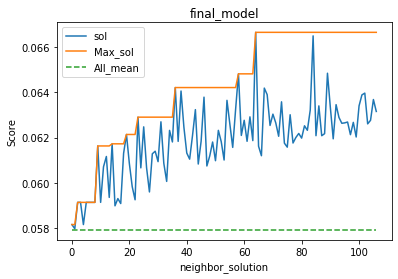

In [55]:
q_plot = []
x_plot = []
max_plt = []
mean_plt=[]
for i in range(len(graph_dot)):
    q_plot.append(graph_dot[i])
    x_plot.append(i)
    max_plt.append(max(q_plot))
    mean_plt.append(0.05793219386042783)
plt.figure()
plt.plot(x_plot, q_plot,label = 'sol')
plt.plot(x_plot, max_plt, label = 'Max_sol')
plt.plot(x_plot, mean_plt,label = 'All_mean',linestyle = '--')

plt.xlabel('neighbor_solution')
plt.ylabel('Score')
plt.title('final_model')
plt.legend()
plt.show()

In [ ]:
start = time.time()


graph_dot = []
tag_num_tabu = []

glo_sol = []
glo_scr = []
desire = base_score
for i in tqdm_notebook(range(1,6)):
    print(i)
    
    tag_num_tabu = []
    sol_l = []
    sol_s = []
    real_sol = []
    real_scr = []
    flg=True
    cnt = 0
    cnt2 = 0
    while(flg):
        cnt+=1
        print('i는',i)
        if cnt == 1:
            insol = Make_insol(i)
            glo_sol.append(insol)
            glo_scr.append(Select_data(insol,data)[0])
            nbr = Make_neighbor_sol(insol,40*(i*i))
            
        else:
            if len(sol_s):
                insol = sol_l[sol_s.index(max(sol_s))]
                nbr = Make_neighbor_sol(insol,40*(i*i))
            else : 
                insol = Make_insol(i)
                nbr = Make_neighbor_sol(insol,40*(i*i))
                
        sol_l = []
        sol_s = []
        #######여기서 nbr 열망함수 적용 
        nbr = check_nbr(nbr,data,desire)
        for j in tqdm_notebook(nbr):
            
            b_nbr = Make_valneighbor(j, 5*(i))
            b_nbr = check_nbr(b_nbr,data,desire)
            sol = find_local_sol(b_nbr)
            if sol : 
                
                a,b = Select_data(sol,data)
                graph_dot.append(a)
                sol_l.append(sol)
                sol_s.append(a)
                
        if len(sol_s):
            s = max(sol_s)
            if cnt >= 2 :
                if max(glo_scr) >= s:
                    cnt2 += 1
                    if cnt2 == 3:
                        flg =False
                else:
                    cnt2 = 0
                print(cnt2)
        else :
            continue        
        
      
        glo_sol.append(sol_l[sol_s.index(s)])
        glo_scr.append(s)
        desire = (sum(glo_scr)+base_score) / (len(glo_scr)+1)
#         print(glo_scr)

        print(max(glo_scr))
        print(glo_sol[glo_scr.index(max(glo_scr))])
print("time :", time.time() - start)

1
i는 1


0.058573185429878785
[[1, 43, 7]]
i는 1


i는 1


i는 1


1
0.058573185429878785
[[1, 43, 7]]
i는 1


i는 1


2
0.058573185429878785
[[1, 43, 7]]
i는 1


i는 1


0
0.05915071862273937
[[1, 26, 10]]
i는 1


1
0.05915071862273937
[[1, 26, 10]]
i는 1


2
0.05915071862273937
[[1, 26, 10]]
i는 1


i는 1


i는 1


i는 1


i는 1


i는 1


i는 1


i는 1


i는 1


i는 1


i는 1


i는 1


i는 1


i는 1


3
0.05915071862273937
[[1, 26, 10]]
2
i는 2


0.059871220541923204
[[1, 12, 10], [1, 44, 6]]
i는 2


1
0.059871220541923204
[[1, 12, 10], [1, 44, 6]]
i는 2


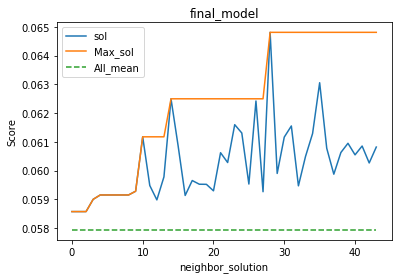

In [46]:
q_plot = []
x_plot = []
max_plt = []
mean_plt=[]
for i in range(len(graph_dot)):
    q_plot.append(graph_dot[i])
    x_plot.append(i)
    max_plt.append(max(q_plot))
    mean_plt.append(0.05793219386042783)
plt.figure()
plt.plot(x_plot, q_plot,label = 'sol')
plt.plot(x_plot, max_plt, label = 'Max_sol')
plt.plot(x_plot, mean_plt,label = 'All_mean',linestyle = '--')

plt.xlabel('neighbor_solution')
plt.ylabel('Score')
plt.title('final_model')
plt.legend()
plt.show()

In [47]:
for i in range(len(glo_sol)):
    
    str_a = ''
    str_tm = ''
    a,b = Select_data(glo_sol[i],data)
    for j in range(len(glo_sol[i])):
        q = glo_sol[i][j]
        
        t = ''
        if q[0]==1:
            t = '*'
        else:
            t = '-'
        str_tm+= t
        str_tm+=' ['
        str_tm+='D'
        str_tm+= str(q[1])
        str_tm+= ' , '
        str_tm+= str(q[2])
        str_tm+='] '
    str_a += str_tm
    print('     스코어 : ',round(a,5),      '     NTU:', b,'       해 : '  ,str_a, )

     스코어 :  0.05793      NTU: 100000        해 :  * [D29 , 1] 
     스코어 :  0.05857      NTU: 1069        해 :  * [D43 , 7] 
     스코어 :  0.059      NTU: 1082        해 :  * [D28 , 10] 
     스코어 :  0.05915      NTU: 1050        해 :  * [D26 , 10] 
     스코어 :  0.05915      NTU: 1050        해 :  * [D26 , 10] 
     스코어 :  0.05915      NTU: 1050        해 :  * [D26 , 10] 
     스코어 :  0.05915      NTU: 1050        해 :  * [D26 , 10] 
     스코어 :  0.05667      NTU: 18800        해 :  * [D20 , 8] - [D24 , 7] 
     스코어 :  0.06117      NTU: 983        해 :  * [D17 , 8] * [D30 , 9] 
     스코어 :  0.05948      NTU: 918        해 :  * [D16 , 8] * [D17 , 7] 
     스코어 :  0.0625      NTU: 1068        해 :  * [D15 , 10] * [D30 , 2] 
     스코어 :  0.05965      NTU: 987        해 :  * [D24 , 2] * [D15 , 7] 
     스코어 :  0.05952      NTU: 1084        해 :  * [D11 , 7] * [D42 , 9] 
     스코어 :  0.05952      NTU: 973        해 :  * [D24 , 7] * [D4 , 6] 
     스코어 :  0.05596      NTU: 1529        해 :  * [D18 , 7] * [D10 , 3] - [D